<a href="https://colab.research.google.com/github/KewangZhili/StockPrizePredictor/blob/main/Submissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED PACKAGES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10



In [4]:
!pip install tensorflow


In [8]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

**READING THE DATASET**

In [10]:
df=pd.read_csv('/content/NSE-Tata-Global-Beverages-Limited.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


**CONVERTING DATE TO DATE-TIME TYPE IN PANDAS AND MAKING IT THE INDEX**

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


**LABELLING THE CLOSED PRICE HISTORY**

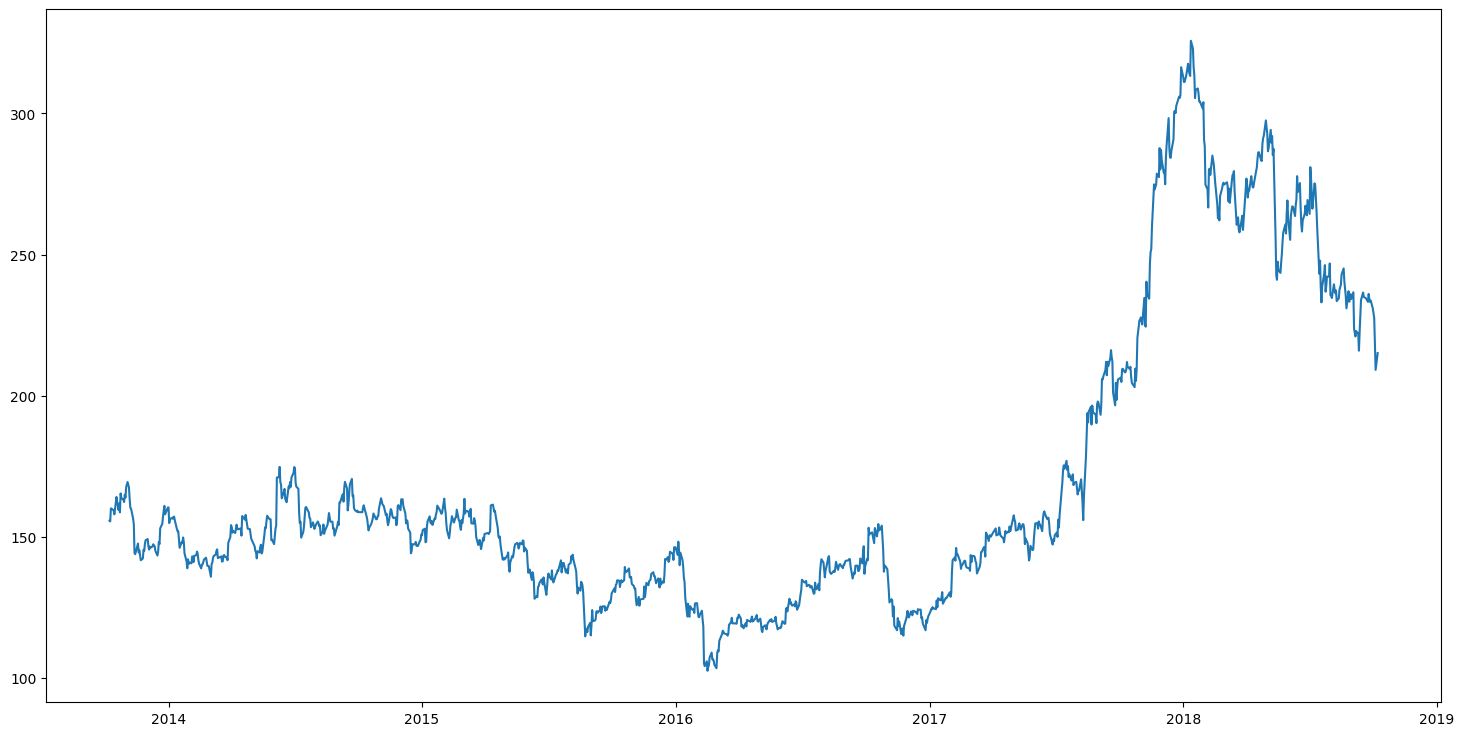

In [13]:
plt.figure(figsize=(18,9))
plt.plot(df['Close'],label='The Closing Prices')

**Sorting the df on index and extracting the date and closing prices**

In [31]:
sorted_df=df.sort_index(ascending=True,axis=0)
new_df=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
sorted_df


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [32]:
for i in range(len(df)):
  new_df['Date'][i]=sorted_df['Date'][i]
  new_df['Close'][i]=sorted_df['Close'][i]
new_df.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


**Scaling the dataset**

In [33]:

final_df=new_df.values
print(final_df)

[[Timestamp('2013-10-08 00:00:00') 155.8]
 [Timestamp('2013-10-09 00:00:00') 155.55]
 [Timestamp('2013-10-10 00:00:00') 160.15]
 ...
 [Timestamp('2018-10-04 00:00:00') 218.2]
 [Timestamp('2018-10-05 00:00:00') 209.2]
 [Timestamp('2018-10-08 00:00:00') 215.15]]


In [34]:
len(final_df)

1235

In [35]:
train_data=final_df[0:980,:]
val_data=final_df[980:,:]

new_df.index=new_df['Date']
new_df.drop('Date',axis=1,inplace=True)
new_df

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_df)
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

**Splitting the dataset into trai and val**

In [40]:
X_train=[]
Y_train=[]
for i in range(60,len(train_data)):
  X_train.append(scaled_data[i-60:i,0])
  Y_train.append(scaled_data[i,0])

In [ ]:
X_train

In [48]:
X_train.shape

(920, 60)

In [49]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [50]:
  X_train.shape

(920, 60, 1)

**BUILDING THE LSTM model**

In [52]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [71]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [57]:
# input=new_df[len(new_df)-len(val_data)-60,:].values
# input=input.reshape(-1,1)
len(new_df)-len(val_data)-60

920

In [65]:
input=new_df[920:].values
input=input.reshape(-1,1)
input=scaler.transform(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**TRAINING THE LSTM MODEL**

In [69]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train,Y_train,epochs=2,batch_size=1,verbose=1)

Epoch 1/2
920/920 [==============================] - 37s 36ms/step - loss: 5.6244e-04
Epoch 2/2
920/920 [==============================] - 31s 33ms/step - loss: 3.3789e-04


**Now testing our model on a slice of entries from our dataset**

In [74]:
X_test=[]
for i in range(60,input.shape[0]):
  X_test.append(input[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [75]:
predicted_closing_price=lstm_model.predict(X_test)

8/8 [==============================] - 2s 43ms/step


**Now inverting the scaled data to obtain the actual predictions**

In [76]:
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

**NOW SAVING THE LSTM MODEL**

In [77]:
lstm_model.save('stock_price_pred.h5')

**NOW COMPARIUNG THE CROSS VALIDATIONS SET WITH ACTUAL DATA**

<ipython-input-92-71bb135d7677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions']=predicted_closing_price


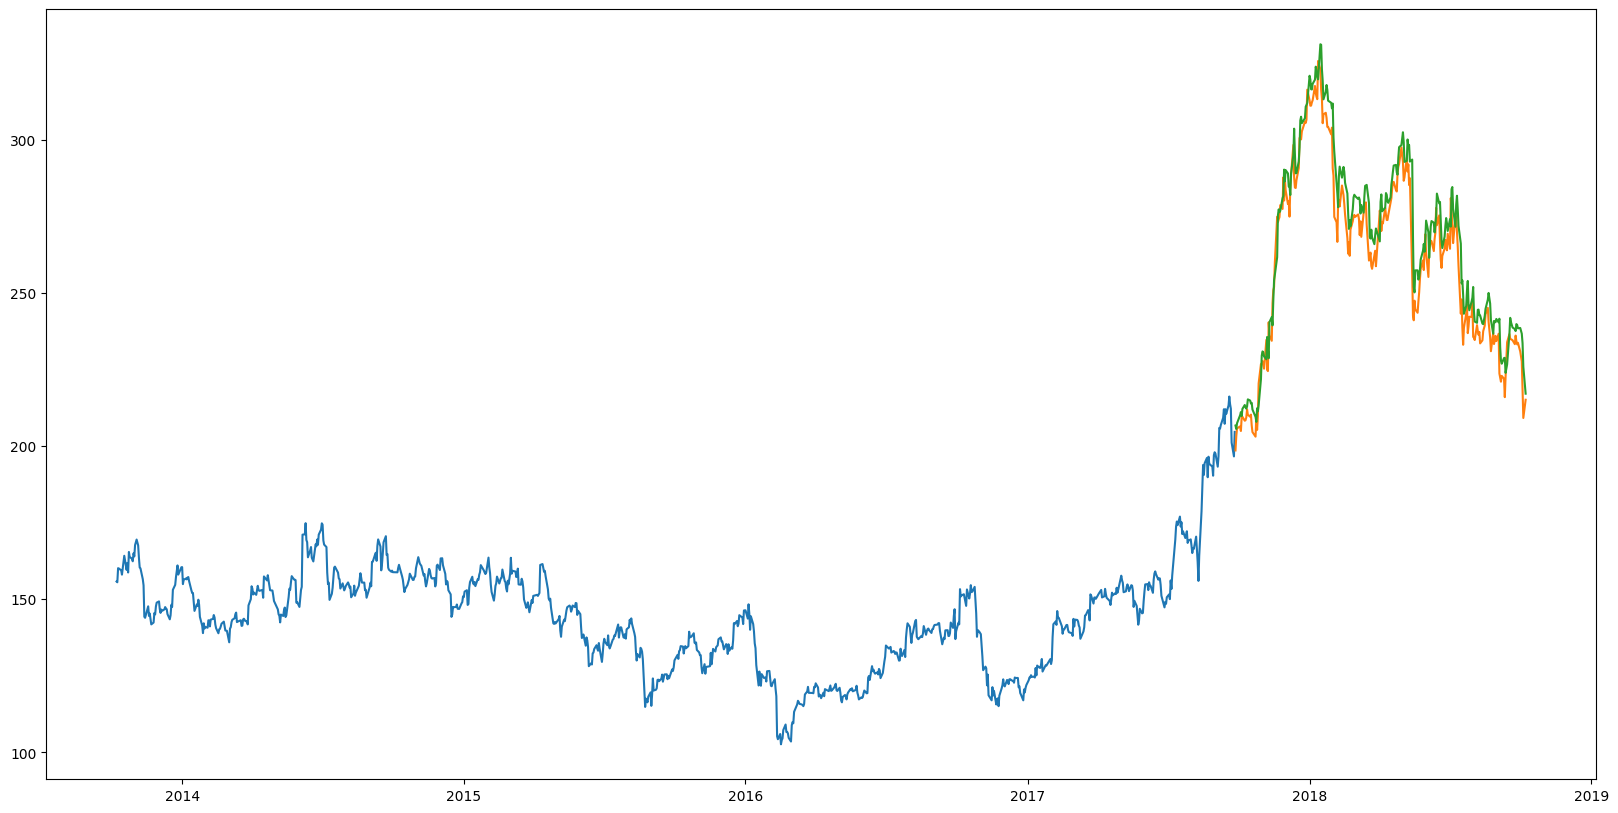

In [92]:
train=new_df[:980]
val=new_df[980:]
val['Predictions']=predicted_closing_price

plt.plot(train['Close'])
plt.plot(val[['Close','Predictions']])

248